In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from rlhfutils.rl_utils import get_synth_rewards
from tqdm import tqdm
from datasets import Dataset, concatenate_datasets

/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-03-13 11:30:36,880] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/trl/trainer/ppo_config.py:142: UserWarning: The `optimize_cuda_cache` argument will be deprecated soon, please use `optimize_device_cache` instead.
  warnings.warn(


In [6]:
%load_ext autoreload
%autoreload 2

In [ ]:
ds = Dataset.load_from_disk("../../../active-rlhf/outputs/data/contrastivedistill/wikionpolicyprompts//")

In [ ]:
len(concatenate_datasets([ds]*10))

In [ ]:
tmp = pd.read_json("../../../active-rlhf/outputs/results//bago.jsonl", orient='records', lines=True)

In [15]:
# tlog = pd.read_json("../../outputs/bagofwords/dynarmlogs/expbow50_updatereprod_fix.jsonl", orient='records', lines=True)
# tlog = pd.read_json("../../../active-rlhf/outputs/results/dynarmlogs/bagofwords/expbow50_reprodtest_exact.jsonl", orient='records', lines=True)
tlog = pd.read_json("../outputs/results/dynarmlogs/math/tinyn.jsonl", orient='records', lines=True)
tmp = tlog
tmp = tmp.dropna(subset='golds')

In [16]:
tmp

,texts,rewards,golds,call
0,[Question: (((2 * 2) - (5 * 1)) + (9 - 4)) = \...,"[-0.059814453125, -0.04931640625]","[3.973809523809524, 3.873015873015873]","[1, 1]"
1,[Question: (((1 * 6) + (2 - 3)) + 2) = \n\nAns...,"[-0.051513671875, -0.07177734375]","[4.135416666666667, 4.135416666666667]","[1, 1]"
2,[Question: (((2 - 8) + (8 + 5)) - 8) = \n\nAns...,"[-0.061279296875, -0.06494140625]","[4.642045454545455, 3.037878787878787]","[1, 1]"
3,[Question: (((4 * 1) - (4 - 9)) + 6) = \n\nAns...,"[-0.08740234375, -0.052001953125]","[3.770833333333333, 4.200892857142858]","[1, 1]"
4,[Question: (((5 + 6) + (8 + 8)) * (4 - (5 * 8)...,"[-0.13671875, 0.11669921874999999]","[3.184063348659622, 3.23323183028152]","[1, 1]"
...,...,...,...,...
23995,[Question: (((4 - 3) * 5) + 1) = \n\nAnswer: ...,"[-0.2099609375, 0.49804687500000006]","[3.958333333333333, 3.958333333333333]","[1500, 1500]"
23996,[Question: (((6 - 4) + (9 * 7)) - 4) = \n\nAns...,"[-0.6015625, -0.10986328125]","[3.303030303030303, 3.464285714285714]","[1500, 1500]"
23997,[Question: (((1 + 7) - 3) - 3) = \n\nAnswer: (...,"[-1.578125, -2.171875]","[3.125, 1.992753623188405]","[1500, 1500]"
23998,[Question: (((2 + 7) * (8 + 8)) - (4 + 1)) = \...,"[-1.328125, -1.09375]","[4.133333333333333, 3.184391534391534]","[1500, 1500]"


In [17]:
rat = 0
ngs = []
accs = []
sind = 0
for ind, row in tmp.iloc[sind:].iterrows():
    # row['golds'] = get_synth_rewards(row['texts'], 'bagofwords')
    if len(row['golds'])==0:
        continue
    if row['golds'][0]==row['golds'][1]:
            continue
    ngs.append(row['golds'])
    if ((row['rewards'][0]>row['rewards'][1])!=(row['golds'][0]>row['golds'][1])):
        rat+=1
        accs.append(0)
    else:
        accs.append(1)
#tmp['golds'] = ngs
print(rat/len(ngs))

0.4786449399656947


In [18]:
tot, corr = 0, 0
vals = []
interv = 200
for j in range(0, len(accs), interv):
    vals.append(mean(accs[j:j+interv]))
    # # check heuristic accuracy
    # for i, row in tmp.iloc[j:j+interv].iterrows():
    #     # if abs(row['rewards'][0]-row['rewards'][1])>row['thresh']:
    #     if row['golds'][0]==row['golds'][1]:
    #         continue
    #     tot = tot+1
    #     corr += 1 if ((row['rewards'][0]>row['rewards'][1])==(row['golds'][0]>row['golds'][1])) else 0
    # vals.append(corr/tot)

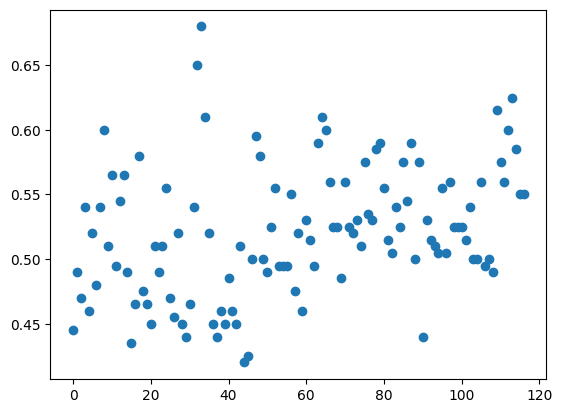

In [19]:
plt.scatter(range(len(vals)), vals)

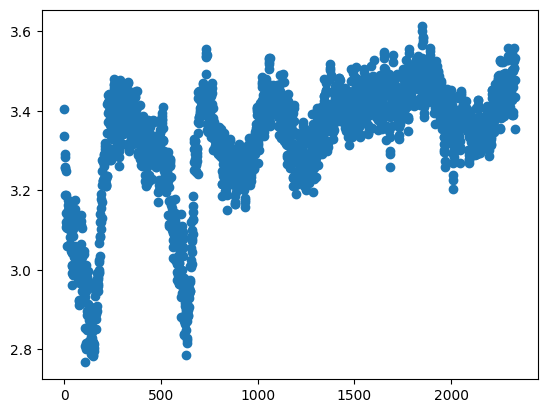

In [20]:
means = [mean(m) for m in ngs]
# means = [mean(m) for m in tmp['rewards']]

interv = 10
mbins = [mean(means[i:i+50]) for i in range(0, len(means), interv)]
plt.scatter(range(len(mbins)), mbins)

In [21]:
mean(means[-200:])

3.4746325515115264

In [ ]:
means = [mean(m) for m in tmp['golds']]
plt.scatter(range(len(means)), means)